# Задание 2. Заполнение пропущенных данных

## Загрузка датасета

Загрузка библиотек

In [621]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


Загрузка датасета

In [622]:
df = pd.read_csv('train.csv')

In [623]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Информация о датасете

In [624]:
df.shape

(1460, 81)

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Процентное соотношение пропущенных данных

In [626]:
df_null_per = df.isnull().sum() / df.shape[0] * 100 
print(df_null_per[df_null_per > 0].count())
print(df_null_per[df_null_per > 0])

19
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Посмотрим на гистрограмму по SalePrice, т.к. этот признак зависит от всех остальных

<AxesSubplot:>

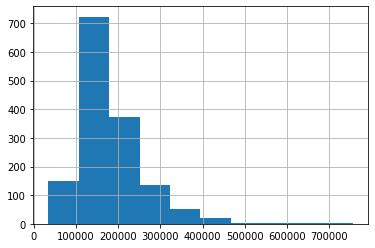

In [627]:
df['SalePrice'].hist()

## Работа с пропусками

### Удаление столбцов

Удаление столбца Fence, т.к. не связан ни с чем и на 80% не заполнен, MiscFeature, т.к. не связан ни с чем и на 96% не заполнен, Alley, т.к. не связан ни с чем и на 93,7% не заполнен.

In [628]:
df = df.drop(['Fence', 'MiscFeature', 'Alley'], axis=1)

### Заполнение пропущенных данных в столбцах

Заполнение нулем пустых значений в LotFrontage

In [629]:
df['LotFrontage'].fillna(0.0, inplace=True)
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,   0.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

Заполнение None пустых значений в MasVnrType

In [630]:
df['MasVnrType'].fillna("None", inplace=True)
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

MasVnrArea. Незаполнены те данные, где MasVnrType == None

In [631]:
df['MasVnrArea'].astype('float')
print("Пропусков до заполнения", df['MasVnrArea'].isna().sum())

df['MasVnrArea'] = np.where(df['MasVnrType']=="None", 0.0, df['MasVnrArea'])

print("Пропусков после заполнения", df['MasVnrArea'].isna().sum())

df['MasVnrArea'].unique()


Пропусков до заполнения 8
Пропусков после заполнения 0


array([ 196.,    0.,  162.,  350.,  186.,  240.,  286.,  306.,  212.,
        180.,  380.,  281.,  640.,  200.,  246.,  132.,  650.,  101.,
        412.,  272.,  456., 1031.,  178.,  573.,  344.,  287.,  167.,
       1115.,   40.,  104.,  576.,  443.,  468.,   66.,   22.,  284.,
         76.,  203.,   68.,  183.,   48.,   28.,  336.,  600.,  768.,
        480.,  220.,  184., 1129.,  116.,  135.,  266.,   85.,  309.,
        136.,  288.,   70.,  320.,   50.,  120.,  436.,  252.,   84.,
        664.,  226.,  300.,  653.,  112.,  491.,  268.,  748.,   98.,
        275.,  138.,  205.,  262.,  128.,  260.,  153.,   64.,  312.,
         16.,  922.,  142.,  290.,  127.,  506.,  297.,  604.,  254.,
         36.,  102.,  472.,  481.,  108.,  302.,  172.,  399.,  270.,
         46.,  210.,  174.,  348.,  315.,  299.,  340.,  166.,   72.,
         31.,   34.,  238., 1600.,  365.,   56.,  150.,  278.,  256.,
        225.,  370.,  388.,  175.,  296.,  146.,  113.,  176.,  616.,
         30.,  106.,

BsmtQual пустые на NA

In [632]:
print("Пропусков до заполения", df['BsmtQual'].isna().sum())
df['BsmtQual'].fillna('NA', inplace=True)
df['BsmtQual'].replace(0, 'NA')
print("Пропусков после заполения", df['BsmtQual'].isna().sum())
df['BsmtQual'].unique()


Пропусков до заполения 37
Пропусков после заполения 0


array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

BsmtCond NA

In [633]:
print("Пропусков до заполения", df['BsmtCond'].isna().sum())
print("Значения NA в BsmtQual, связанном столбце", df['BsmtQual'].loc[df['BsmtQual'] == 'NA'].count())
df['BsmtCond'] = np.where(df['BsmtQual'] == "NA", 'NA', df['BsmtCond'])
print("Пропусков после заполнения", df['BsmtCond'].isna().sum())
df['BsmtCond'].unique()


Пропусков до заполения 37
Значения NA в BsmtQual, связанном столбце 37
Пропусков после заполнения 0


array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

BsmtExposure NA

In [634]:
print("Пропусков до заполения", df['BsmtExposure'].isna().sum())
print("Значения NA в BsmtQual, связанном столбце",
      df['BsmtQual'].loc[df['BsmtQual'] == 'NA'].count())
df['BsmtExposure'] = np.where(df['BsmtQual'] == "NA", 'NA', df['BsmtExposure'])
print("Пропусков после заполнения", df['BsmtExposure'].isna().sum())
df['BsmtExposure'].unique()


Пропусков до заполения 38
Значения NA в BsmtQual, связанном столбце 37
Пропусков после заполнения 1


array(['No', 'Gd', 'Mn', 'Av', 'NA', nan], dtype=object)

Остался один пропуск, который соответствует значению Gd в BsmtQual

In [635]:
df.loc[df['BsmtExposure'].isnull()]['BsmtQual']


948    Gd
Name: BsmtQual, dtype: object

Найдем медиану BsmtExposure по тем строкам, где BsmtQual == Gd

In [636]:
dtemp = df.loc[df['BsmtQual'] == 'Gd']['BsmtExposure']
dtemp.head()

0    No
1    Gd
2    Mn
4    Av
5    No
Name: BsmtExposure, dtype: object

Заменим пропуск на Av - Average Exposure (split levels or foyers typically score average or above)

In [637]:
df['BsmtExposure'] = np.where(df['BsmtExposure'].isnull(), 'Av', df['BsmtExposure'])
print("Пропусков после заполнения", df['BsmtExposure'].isna().sum())
df['BsmtExposure'].unique()


Пропусков после заполнения 0


array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

BsmtFinType1 NA

In [638]:
print("Пропусков до заполения", df['BsmtFinType1'].isna().sum())
print("Значения NA в BsmtQual, связанном столбце",
      df['BsmtQual'].loc[df['BsmtQual'] == 'NA'].count())
df['BsmtFinType1'] = np.where(df['BsmtQual'] == "NA", 'NA', df['BsmtFinType1'])
print("Пропусков после заполнения", df['BsmtFinType1'].isna().sum())
df['BsmtFinType1'].unique()


Пропусков до заполения 37
Значения NA в BsmtQual, связанном столбце 37
Пропусков после заполнения 0


array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

BsmtFinType2 NA

In [639]:
print("Пропусков до заполения", df['BsmtFinType2'].isna().sum())
print("Значения NA в BsmtQual, связанном столбце",
      df['BsmtQual'].loc[df['BsmtQual'] == 'NA'].count())
df['BsmtFinType2'] = np.where(df['BsmtQual'] == "NA", 'NA', df['BsmtFinType2'])
print("Пропусков после заполнения", df['BsmtFinType2'].isna().sum())
df['BsmtFinType2'].unique()


Пропусков до заполения 38
Значения NA в BsmtQual, связанном столбце 37
Пропусков после заполнения 1


array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ', nan], dtype=object)

Найдем оставшийся пропуск

In [640]:
df.loc[df['BsmtFinType2'].isnull()]['BsmtQual']

332    Gd
Name: BsmtQual, dtype: object

In [641]:
dtemp = df.loc[df['BsmtQual'] == 'Gd']['BsmtFinType2']
dtemp.head()


0    Unf
1    Unf
2    Unf
4    Unf
5    Unf
Name: BsmtFinType2, dtype: object

Заменим его на Unf

In [642]:
df['BsmtFinType2'] = np.where(
    df['BsmtFinType2'].isnull(), 'Unf', df['BsmtFinType2'])
print("Пропусков после заполнения", df['BsmtFinType2'].isna().sum())
df['BsmtFinType2'].unique()


Пропусков после заполнения 0


array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

Electrical мода

In [643]:
print("Пропусков до заполения", df['Electrical'].isna().sum())
df['Electrical'].unique()

Пропусков до заполения 1


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

Мода этого столбца

In [644]:
mod = df['Electrical'].mode()
print(mod)


0    SBrkr
dtype: object


Строка с пропуском

In [645]:
df.loc[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,5,2008,WD,Normal,167500


Найдем строку по Id и заменим пропуск на моду

In [646]:
df['Electrical'] = np.where(df['Id'] == 1380, mod, df['Electrical'])
print("Пропусков после заполнения", df['Electrical'].isna().sum())
df['Electrical'].unique()

Пропусков после заполнения 0


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

FireplaceQu NA (зависит от Fireplaces)

In [647]:
print("Пропусков до заполения", df['FireplaceQu'].isna().sum())
print("Значения NA в Fireplaces, связанном столбце",
      df['Fireplaces'].loc[df['Fireplaces'] == 0].count())
df['FireplaceQu'] = np.where(df['Fireplaces'] == 0, 'NA', df['FireplaceQu'])
print("Пропусков после заполнения", df['FireplaceQu'].isna().sum())
df['FireplaceQu'].unique()


Пропусков до заполения 690
Значения NA в Fireplaces, связанном столбце 690
Пропусков после заполнения 0


array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

GarageType NA (от него зависят другие столбцы, поэтому NA)

In [648]:
print("Пропусков до заполения", df['GarageType'].isna().sum())
df['GarageType'] = np.where(df['GarageType'].isnull(), 'NA', df['GarageType'])
print("Пропусков после заполнения", df['GarageType'].isna().sum())
df['GarageType'].unique()


Пропусков до заполения 81
Пропусков после заполнения 0


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment',
       '2Types'], dtype=object)

GarageYrBlt NA

In [649]:
print("Пропусков до заполения", df['GarageYrBlt'].isna().sum())
print("Значения NA в GarageType, связанном столбце",
      df['GarageType'].loc[df['GarageType'] == 'NA'].count())
df['GarageYrBlt'] = np.where(df['GarageType'] == 'NA', 0, df['GarageYrBlt'])
print("Пропусков после заполнения", df['GarageYrBlt'].isna().sum())
df['GarageYrBlt'].unique()


Пропусков до заполения 81
Значения NA в GarageType, связанном столбце 81
Пропусков после заполнения 0


array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,    0., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

GarageFinish NA

In [650]:
print("Пропусков до заполения", df['GarageFinish'].isna().sum())
print("Значения NA в GarageType, связанном столбце",
      df['GarageType'].loc[df['GarageType'] == 'NA'].count())
df['GarageFinish'] = np.where(df['GarageType'] == 'NA', 'NA', df['GarageFinish'])
print("Пропусков после заполнения", df['GarageFinish'].isna().sum())
df['GarageFinish'].unique()


Пропусков до заполения 81
Значения NA в GarageType, связанном столбце 81
Пропусков после заполнения 0


array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

GarageQual NA

In [651]:
print("Пропусков до заполения", df['GarageQual'].isna().sum())
print("Значения NA в GarageType, связанном столбце",
      df['GarageType'].loc[df['GarageType'] == 'NA'].count())
df['GarageQual'] = np.where(
    df['GarageType'] == 'NA', 'NA', df['GarageQual'])
print("Пропусков после заполнения", df['GarageQual'].isna().sum())
df['GarageQual'].unique()


Пропусков до заполения 81
Значения NA в GarageType, связанном столбце 81
Пропусков после заполнения 0


array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

GarageCond NA

In [652]:
print("Пропусков до заполения", df['GarageCond'].isna().sum())
print("Значения NA в GarageType, связанном столбце",
      df['GarageType'].loc[df['GarageType'] == 'NA'].count())
df['GarageCond'] = np.where(
    df['GarageType'] == 'NA', 'NA', df['GarageCond'])
print("Пропусков после заполнения", df['GarageCond'].isna().sum())
df['GarageCond'].unique()


Пропусков до заполения 81
Значения NA в GarageType, связанном столбце 81
Пропусков после заполнения 0


array(['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], dtype=object)

PoolQC NA (зависит от PoolArea)

In [653]:
print("Пропусков до заполения", df['PoolQC'].isna().sum())
print("Значения NA в PoolArea, связанном столбце",
      df['PoolArea'].loc[df['PoolArea'] == 0].count())
df['PoolQC'] = np.where(
    df['PoolArea'] == 0, 'NA', df['PoolQC'])
print("Пропусков после заполнения", df['PoolQC'].isna().sum())
df['PoolQC'].unique()


Пропусков до заполения 1453
Значения NA в PoolArea, связанном столбце 1453
Пропусков после заполнения 0


array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

Контрольная проверка пропусков

In [654]:
df_null_per = df.isnull().sum() / df.shape[0] * 100
print(df_null_per[df_null_per > 0].count())


0


Пропуски заполнены.

## Работа с выбросами

По числовым данным проанализируем выбросы и удалим их

In [655]:
df['YrSold'].unique()


array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [656]:
cat_cols = ['Id', 'GarageYrBlt', 'MSSubClass',
            'OverallQual', 'OverallCond',  'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'Fireplaces', '3SsnPorch', 'YrSold', 'BsmtUnfSF', 'LowQualFinSF',
            'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SalePrice', 'GarageCars', 'EnclosedPorch', 'ScreenPorch', 'LotArea',
            'GarageArea', 'OpenPorchSF']
# for col in cat_cols:
#     if col == "Id" : continue
#     print(df[col].unique())


In [657]:
def drop_out(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    dif = q3 - q1
    # реализуем правило удаления выбросов
    down = q1 - 1.5 * dif
    up = q3 + 1.5 * dif
    df.drop(df[(df[col] < down) | (df[col] > up)].index, inplace=True)


df_numerics_only = (list)(df.select_dtypes(include=np.number))

for cat_col in cat_cols:
    df_numerics_only.remove(cat_col)

for col in df_numerics_only:
    drop_out(df, col)


In [658]:
df_numerics_only

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [659]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NA,0,12,2008,WD,Normal,250000


Размер датасета после работы с пропусками и удаления выбросов

In [660]:
df.shape

(1056, 78)

Посмотрим на график признака SalePrice после обработки датасета

<AxesSubplot:>

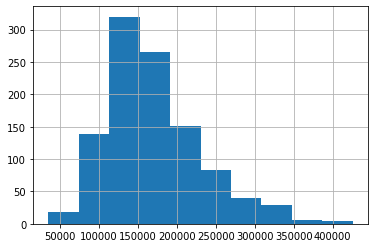

In [661]:
df['SalePrice'].hist()